<a href="https://colab.research.google.com/github/AlexeyLebedev1/MachineLearningCourse/blob/master/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Dataset
Датасет содержит данные о красном и белом Португальском вине "Vinho Verde". На входе модели подается цвет вина и следующие 11 признаков:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulfates
- alcohol

На выходе получаем оценку качества вина - quality (от 1 до 10).

Наша цель - проанализировать данные, подготовить их для работы с моделью и попрообовать обучить модель методом ближайших соседей.

## Чтение данных

In [26]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score

In [27]:
raw_data = pd.read_csv('winequalityN.csv')
raw_data.head()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Визуализация данных

In [28]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [29]:
fig = px.pie(values=raw_data['type'].value_counts(),
             names =raw_data['type'].value_counts().index,
             )
fig.update_traces(hole=.6, hoverinfo="label+percent",marker=dict(colors=['snow','tomato'],line=dict(color=['black'],width=1)))
fig.add_annotation(x=0.50,y=0.5,text='Wine Types',showarrow=False,font=dict(size=20,color='Steelblue'))
fig.add_annotation(x=0.27,y=0.8,text='Red Wine',showarrow=False,font=dict(size=15,color='tomato'))
fig.add_annotation(x=0.75,y=0.6,text='White Wine',showarrow=False,font=dict(size=15,color='gold'))

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    showlegend=False,
    title = {'font': {
                        'family':'monospace',
                        'size': 22,
                        'color':'grey'},
            'text':'Distribution Of Red & White Wine',
            'x':0.50,'y':1})
fig.show()

Из диаграммы видно что белых вин в датасете гораздо больше.

In [30]:
white = raw_data[raw_data['type']=='white']
red = raw_data[raw_data['type'] == 'red']

fig = make_subplots(rows=1, cols=2, 
                    column_widths=[0.35, 0.35],
                    subplot_titles=['White Wine Quality', 'Red Wine Quality'])

fig.append_trace(go.Bar(x=white['quality'].value_counts().index,
                        y=white['quality'].value_counts(),
                        text = white['quality'].value_counts(),
                        marker=dict(
                        color='snow',
                        line=dict(color='black', width=1)
                ),
                        name=''
               ), 1,1
             )

fig.append_trace(go.Bar(x=red['quality'].value_counts().index,
                        y=red['quality'].value_counts(),
                        text=red['quality'].value_counts(),
                        marker=dict(
                        color='coral',
                        line=dict(color='red', width=1)
                ),
                        name=''
               ), 1,2
             )

fig.update_traces(textposition='outside')

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':100},
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    showlegend=False,
    title = {'font': {
                        'family':'monospace',
                        'size': 22,
                        'color':'grey'},
            'text':'Quality Distribution In Red & White Wine',
            'x':0.50,'y':1})


fig.show()

Классы несбалансированны - большинство вин имею оценку 5 или 6. Вина с оценками 1,2,10 отсутствуют. При этом большая часть белых вин имеет оценку выше чем большая часть красных вин.

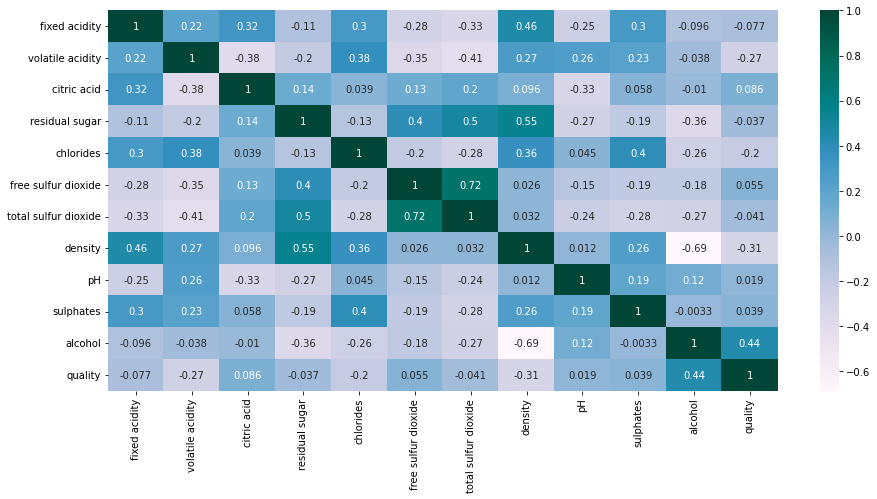

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(raw_data.corr(),annot=True,cmap='PuBuGn')
plt.show()

Из корелляционно матрицы можно какие признаки зависят друг от друга, например коэфициент между алкоголем и качеством говорит чем больше алкголя тем лучше оценка.

## Обработка пропущенных значений

In [32]:
raw_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Датасет содержит небольшое количество пропущенных значений. Заполним их усреднением.

In [33]:
for col in raw_data.columns[raw_data.isnull().any()]:
    raw_data[col].fillna(raw_data[col].mean(), inplace = True)

In [34]:
raw_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Обработка категориальных признаков

Цвет вина 'type' в датасете представлен строкой. Со строкой работать неудобно, и в данном случае легко заменить строку числовым признаком - white = 0, red = 1.

In [35]:
raw_data = raw_data.replace({'type': {'white': 0, 'red': 1}})
raw_data['type']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: int64

# Нормализация
Разделим входные данные и метки и нормализуем входные данные.

In [36]:
x = raw_data.drop('type', 1).values
y = raw_data['type'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [37]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Разбиение на тестовую и обучающую выборку

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)


## Обучение
Теперь мы готовы запустить классификатор ближайших соседей с количеством соседей от 1 до 30 и проверить точность на тестовой выборке

In [39]:
for n in range(1, 30):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(x_train, y_train)
  y_test_pred = model.predict(x_test)
  y_train_pred = model.predict(x_train)
  test_score = precision_score(y_test, y_test_pred)
  train_score = precision_score(y_train, y_train_pred)
  print(f"Neighbours: {n}, train_score: {train_score}, test_score: {test_score}")

Neighbours: 1, train_score: 0.9991087344028521, test_score: 0.9831932773109243
Neighbours: 2, train_score: 1.0, test_score: 0.9957081545064378
Neighbours: 3, train_score: 0.9964125560538116, test_score: 0.9915074309978769
Neighbours: 4, train_score: 0.9972948602344455, test_score: 0.9957264957264957
Neighbours: 5, train_score: 0.9937388193202147, test_score: 0.9915254237288136
Neighbours: 6, train_score: 0.9954995499549955, test_score: 0.9915074309978769
Neighbours: 7, train_score: 0.9937275985663082, test_score: 0.9915254237288136
Neighbours: 8, train_score: 0.9937275985663082, test_score: 0.9936170212765958
Neighbours: 9, train_score: 0.9901785714285715, test_score: 0.9915074309978769
Neighbours: 10, train_score: 0.9910634495084897, test_score: 0.9935897435897436
Neighbours: 11, train_score: 0.98753339269813, test_score: 0.9893617021276596
Neighbours: 12, train_score: 0.9910634495084897, test_score: 0.9935897435897436
Neighbours: 13, train_score: 0.9884135472370766, test_score: 0.987

Удалось достаточно точно предсказать quality независимо от числа соседей. В таком случае оптимальным с точки зрения производительности будет использование одного соседа.